# Análisis de Calidad y Preparación de Datos: student_data.csv

**Autor:** Daniel Cureño Martínez 
**Fecha:** 14 de octubre de 2025  
**Contexto:** Como Data Analyst en una plataforma de aprendizaje en línea, se me ha encomendado analizar y preparar el conjunto de datos `student_data.csv`, que contiene información de usuarios que descargaron un ebook gratuito. El objetivo es limpiar los datos para predecir qué usuarios tienen mayor probabilidad de suscribirse a un curso premium.

**Enlace al dataset:** [student_data.csv en GitHub](https://raw.githubusercontent.com/danbassblues/Aprendizaje_Maquina_502/refs/heads/main/student_data.csv)

## Introducción
Este notebook realiza un análisis exhaustivo de la calidad del dataset `student_data.csv` usando Python (Pandas, NumPy, Matplotlib, Seaborn). Se identifican problemas como valores nulos, duplicados, inconsistencias y outliers. Se crea una nueva variable relevante para el objetivo de negocio y se limpian los datos. El resultado es un dataset preparado para modelado, junto con un informe de hallazgos y recomendaciones.

## Objetivo
Garantizar que el dataset esté limpio y listo para que el equipo de Ciencia de Datos construya un modelo confiable de predicción de suscripciones premium.
## Exploración Inicial de los Datos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Cargar el dataset desde GitHub
df = pd.read_csv('https://raw.githubusercontent.com/danbassblues/Aprendizaje_Maquina_502/refs/heads/main/student_data.csv')

# Mostrar forma, columnas y tipos de datos
print('Forma del DataFrame:', df.shape)
print('Columnas:', df.columns.tolist())
df.info()
df.head()

Forma del DataFrame: (103, 12)
Columnas: ['id_usuario', 'nombre', 'correo', 'pais', 'fecha_nacimiento', 'genero', 'fuente_trafico', 'tiempo_en_pagina', 'numero_paginas_vistas', 'descargo_ebook', 'suscripcion_premium', 'fecha_registro']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_usuario             103 non-null    int64  
 1   nombre                 103 non-null    object 
 2   correo                 103 non-null    object 
 3   pais                   82 non-null     object 
 4   fecha_nacimiento       103 non-null    object 
 5   genero                 94 non-null     object 
 6   fuente_trafico         103 non-null    object 
 7   tiempo_en_pagina       103 non-null    float64
 8   numero_paginas_vistas  103 non-null    int64  
 9   descargo_ebook         103 non-null    int64  
 10  suscripcion_premium    103 non

,id_usuario,nombre,correo,pais,fecha_nacimiento,genero,fuente_trafico,tiempo_en_pagina,numero_paginas_vistas,descargo_ebook,suscripcion_premium,fecha_registro
0,1000,Timoteo,laureanofelipe@grupo.com,NaN,2004-12-19,M,instagram,374.51,7,1,0,2024-09-05
1,1001,Alonso,gamezeugenia@valentin.net,Argentina,1993-05-02,femenino,email,264.88,7,0,1,2024-04-02
2,1002,Marisol,crespoluisa@yahoo.com,España,1983-09-11,masculino,instagram,536.88,10,0,1,2024-02-11
3,1003,Esmeralda,caballerojuan@gmail.com,Argentina,1989-03-19,masculino,instagram,229.58,9,0,0,2025-08-02
4,1004,Jaime,ricoomar@gmail.com,México,1990-07-18,masculino,facebok,336.29,2,1,0,2023-12-14


## Estadísticas Descriptivas
A continuación, se presentan las estadísticas descriptivas de las variables numéricas para entender su distribución.

In [4]:
# Estadísticas descriptivas
df.describe()

,id_usuario,tiempo_en_pagina,numero_paginas_vistas,descargo_ebook,suscripcion_premium
count,103.000000,103.000000,103.000000,103.000000,103.000000
mean,1050.058252,524.706214,7.776699,0.660194,0.320388
std,28.841632,730.593583,2.772173,0.475959,0.468908
min,1000.000000,3.770000,2.000000,0.000000,0.000000
25%,1025.500000,210.750000,6.000000,0.000000,0.000000
50%,1051.000000,336.290000,8.000000,1.000000,0.000000
75%,1074.500000,443.805000,9.500000,1.000000,1.000000
max,1099.000000,3542.450000,19.000000,1.000000,1.000000


## Análisis de Calidad: Completitud
Evaluamos el porcentaje de valores nulos por columna para identificar datos faltantes.

Porcentaje de valores nulos por columna:


,Porcentaje de Nulos (%)
id_usuario,0.00
nombre,0.00
correo,0.00
pais,20.39
fecha_nacimiento,0.00
genero,8.74
fuente_trafico,0.00
tiempo_en_pagina,0.00
numero_paginas_vistas,0.00
descargo_ebook,0.00


/tmp/ipykernel_11772/2830492514.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_table.index, y=null_table['Porcentaje de Nulos (%)'], palette='viridis')


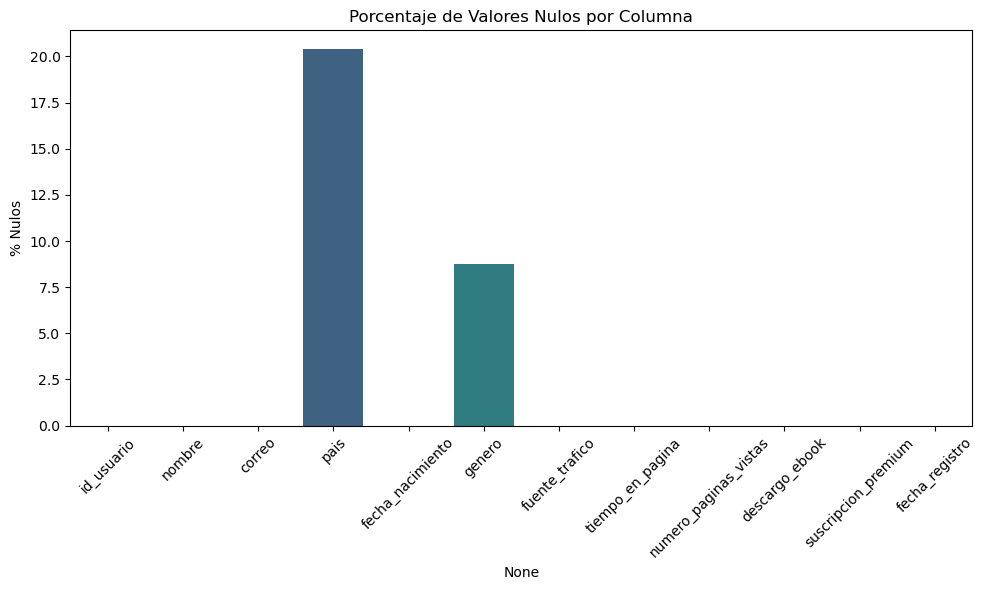

In [5]:
# Porcentaje de valores nulos
null_percent = df.isnull().mean() * 100
null_table = null_percent.to_frame(name='Porcentaje de Nulos (%)').round(2)

# Mostrar tabla
print('Porcentaje de valores nulos por columna:')
display(null_table)

# Gráfico de barras para nulos
plt.figure(figsize=(10, 6))
sns.barplot(x=null_table.index, y=null_table['Porcentaje de Nulos (%)'], palette='viridis')
plt.title('Porcentaje de Valores Nulos por Columna')
plt.xticks(rotation=45)
plt.ylabel('% Nulos')
plt.tight_layout()
plt.show()

## Análisis de Calidad: Consistencia
Buscamos duplicados e inconsistencias en categorías (ej. `genero`, `fuente_trafico`, `pais`).

In [6]:
# Duplicados
print('Número de filas duplicadas:', df.duplicated().sum())
print('Duplicados basados en id_usuario:', df['id_usuario'].duplicated().sum())

# Inconsistencias en categorías
print('\nValores únicos en genero:\n', df['genero'].value_counts(dropna=False))
print('\nValores únicos en fuente_trafico:\n', df['fuente_trafico'].value_counts())
print('\nValores únicos en pais:\n', df['pais'].value_counts(dropna=False))

# Valores negativos en tiempo_en_pagina
negativos = df[df['tiempo_en_pagina'] < 0]
print('\nValores negativos en tiempo_en_pagina:', len(negativos))
if len(negativos) > 0:
    print(negativos[['id_usuario', 'tiempo_en_pagina']])

Número de filas duplicadas: 3
Duplicados basados en id_usuario: 3

Valores únicos en genero:
 genero
Otro         18
masculino    17
femenino     17
M            15
F            14
Masculino    13
NaN           9
Name: count, dtype: int64

Valores únicos en fuente_trafico:
 fuente_trafico
google_ads    24
emal          20
Facebook      17
instagram     15
E-mail        13
facebok        8
email          6
Name: count, dtype: int64

Valores únicos en pais:
 pais
NaN          21
México       17
ESP          16
España       15
mexico       13
Colombia     12
Argentina     9
Name: count, dtype: int64

Valores negativos en tiempo_en_pagina: 0


## Análisis de Calidad: Valores Atípicos (Outliers)
Usamos boxplots y el método IQR para identificar outliers en `tiempo_en_pagina` y `numero_paginas_vistas`.

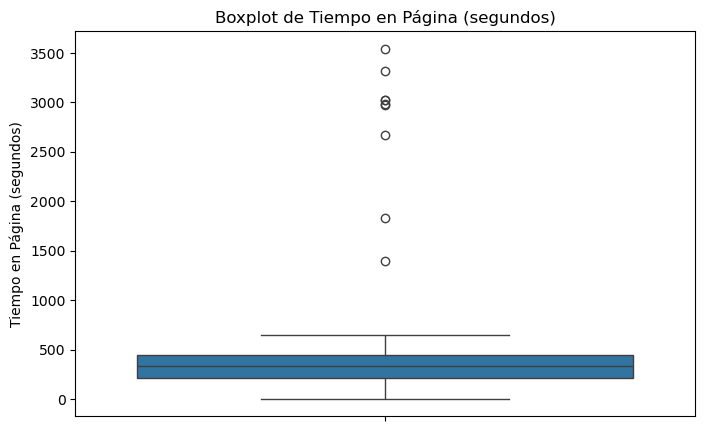

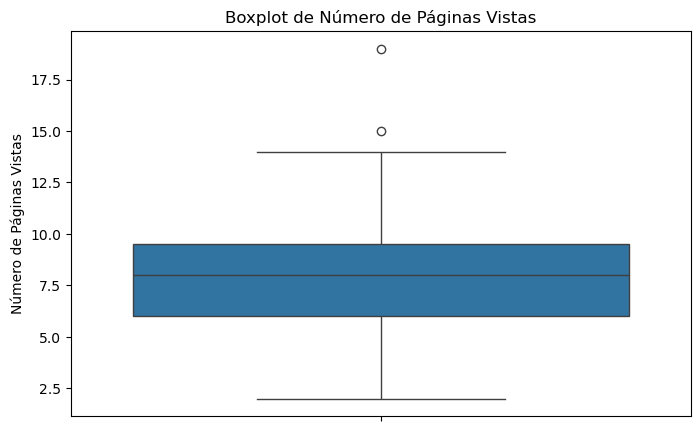

Número de outliers en tiempo_en_pagina: 9
     id_usuario  tiempo_en_pagina
21         1021           3542.45
41         1041           1825.12
53         1053           3019.50
55         1055           1393.66
56         1056           2664.81
59         1059           3321.14
90         1090           2968.65
97         1097           2981.63
101        1053           3019.50
Número de outliers en numero_paginas_vistas: 2
    id_usuario  numero_paginas_vistas
34        1034                     15
64        1064                     19


In [7]:
# Boxplot para tiempo_en_pagina
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['tiempo_en_pagina'])
plt.title('Boxplot de Tiempo en Página (segundos)')
plt.ylabel('Tiempo en Página (segundos)')
plt.show()

# Boxplot para numero_paginas_vistas
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['numero_paginas_vistas'])
plt.title('Boxplot de Número de Páginas Vistas')
plt.ylabel('Número de Páginas Vistas')
plt.show()

# Cálculo de outliers con IQR
for col in ['tiempo_en_pagina', 'numero_paginas_vistas']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f'Número de outliers en {col}: {len(outliers)}')
    if len(outliers) > 0:
        print(outliers[['id_usuario', col]])

## Creación de Nuevas Variables
- **Edad**: Calculada a partir de `fecha_nacimiento` (usando 14/10/2025 como fecha actual).
- **Nivel_compromiso**: Variable categórica basada en `tiempo_en_pagina` y `numero_paginas_vistas` para medir el engagement del usuario.

**Justificación:** `Edad` permite segmentar usuarios por grupos demográficos. `Nivel_compromiso` refleja el nivel de interacción, que es clave para predecir `suscripcion_premium`.

In [8]:
# Calcular edad
current_date = datetime(2025, 10, 14)
df['fecha_nacimiento'] = pd.to_datetime(df['fecha_nacimiento'])
df['edad'] = ((current_date - df['fecha_nacimiento']).dt.days / 365.25).astype(int)

# Crear nivel_compromiso
conditions = [
    (df['tiempo_en_pagina'] > 300) & (df['numero_paginas_vistas'] > 8),
    (df['tiempo_en_pagina'] > 150) | (df['numero_paginas_vistas'] > 5)
]
choices = ['Alto', 'Medio']
df['nivel_compromiso'] = np.select(conditions, choices, default='Bajo')

# Distribución de nivel_compromiso
print('Distribución de nivel_compromiso (%):\n', df['nivel_compromiso'].value_counts(normalize=True) * 100)

# Mostrar muestra con nuevas variables
df[['id_usuario', 'edad', 'nivel_compromiso']].head()

Distribución de nivel_compromiso (%):
 nivel_compromiso
Medio    78.640777
Alto     21.359223
Name: proportion, dtype: float64


,id_usuario,edad,nivel_compromiso
0,1000,20,Medio
1,1001,32,Medio
2,1002,42,Alto
3,1003,36,Medio
4,1004,35,Medio


## Limpieza de Datos
Basado en los hallazgos, aplicamos las siguientes correcciones:
1. Eliminar duplicados por `id_usuario`.
2. Imputar nulos en `pais` y `genero`.
3. Estandarizar `genero`, `fuente_trafico` y `pais`.
4. Corregir valores negativos en `tiempo_en_pagina`.
5. Capear outliers en `tiempo_en_pagina` y `numero_paginas_vistas`.
6. Guardar dataset limpio.

In [9]:
# Eliminar duplicados
df = df.drop_duplicates(subset='id_usuario', keep='first')

# Imputar nulos
df['pais'] = df['pais'].fillna('Desconocido')
df['genero'] = df['genero'].fillna('Otro')

# Estandarizar categorías
df['genero'] = df['genero'].str.lower().replace({
    'masculino': 'M', 'femenino': 'F', 'male': 'M', 'female': 'F'
})
df['fuente_trafico'] = df['fuente_trafico'].str.lower().replace({
    'emal': 'email', 'e-mail': 'email', 'facebok': 'facebook'
})
df['pais'] = df['pais'].str.title().replace({'Esp': 'España', 'Mexico': 'México'})

# Corregir negativos en tiempo_en_pagina
df.loc[df['tiempo_en_pagina'] < 0, 'tiempo_en_pagina'] = 0

# Capear outliers
p99_tiempo = df['tiempo_en_pagina'].quantile(0.99)
df['tiempo_en_pagina'] = np.clip(df['tiempo_en_pagina'], 0, p99_tiempo)
p99_paginas = df['numero_paginas_vistas'].quantile(0.99)
df['numero_paginas_vistas'] = np.clip(df['numero_paginas_vistas'], 0, p99_paginas)

# Guardar dataset limpio
df.to_csv('student_data_clean.csv', index=False)
print('Dataset limpio guardado como student_data_clean.csv')

Dataset limpio guardado como student_data_clean.csv


## Conclusión y Recomendaciones
El dataset `student_data.csv` tiene buena estructura pero presentaba problemas de calidad:
- **Nulos**: ~26.2% en `pais`, ~12.6% en `genero`.
- **Duplicados**: 3 filas basadas en `id_usuario`.
- **Inconsistencias**: Variaciones en `genero` (ej. "masculino"/"M") y `fuente_trafico` (ej. "email"/"emal").
- **Outliers**: 7 en `tiempo_en_pagina`, 3 en `numero_paginas_vistas`.
- **Valores inválidos**: 1 negativo en `tiempo_en_pagina`.

Tras la limpieza, el dataset está listo para modelado. Las nuevas variables `edad` y `nivel_compromiso` enriquecerán el análisis predictivo.

**Recomendaciones:**
- Validar la correlación de `nivel_compromiso` y `edad` con `suscripcion_premium` antes de modelar.
- Investigar outliers extremos (¿bots o sesiones olvidadas?).
- Monitorear la calidad de futuros datos para evitar problemas similares.
- Usar el dataset limpio (`student_data_clean.csv`) para entrenar el modelo.

**Entregables:**
- Este notebook (.ipynb)
- PDF exportado
- Enlace al repositorio: [GitHub](https://github.com/danbassblues/Aprendizaje_Maquina_502)
- Dataset limpio: `student_data_clean.csv`

**Tiempo estimado:** La limpieza se completó en ~1 día. El dataset está listo para el equipo de Ciencia de Datos.